In [1]:
def f(ex, ey, mu, kx, ky, kz, w):
    return ky*(kx**2+ky**2+kz**2-ex*mu*w**2)/kx/(kx**2+ky**2+kz**2-ey*mu*w**2)

def g(ex, ey, mu, kx, ky, kz, w):
    return -ky*w*(ey*(ky**2+kz**2)+ex*(kx**2-ey*mu*w**2))/kx/kz/(kx**2+ky**2+kz**2-ey*mu*w**2)

def h(ex, ey, mu, kx, ky, kz, w):
    return w*(ey*ky**2+ex*(kx**2+kz**2-ey*mu*w**2))/kz/(kx**2+ky**2+kz**2-ey*mu*w**2)

def fp(ex, ey, mu, kx, ky, kz, w):
    return kx*(kx**2+ky**2+kz**2-ex*mu*w**2)/ky/(kx**2+ky**2+kz**2-ex*mu*w**2)

def gp(ex, ey, mu, kx, ky, kz, w):
    return -w*(ey*(ky**2+kz**2)+ex*(kx**2-ey*mu*w**2))/kz/(kx**2+ky**2+kz**2-ex*mu*w**2)

def hp(ex, ey, mu, kx, ky, kz, w):
    return kx*w*(ey*ky**2+ex*(kx**2+kz**2-ey*mu*w**2))/ky/kz/(kx**2+ky**2+kz**2-ex*mu*w**2)

def propagation(ex, ey, ez, mu, kx, ky, w):
    k = np.zeros((4), dtype = complex)
    
    det = -4*ez*(kx**2+ky**2-ez*mu*w**2)*(ey*ky**2+ex*(kx**2-ey*mu*w**2))+(ey*ky**2+ez*(kx**2+ky**2-ey*mu*w**2)+ex*(kx**2-ez*mu*w**2))**2
    
    k[0] = np.sqrt(-((ex+ez)*kx**2+(ey+ez)*ky**2-(ex+ey)*ez*mu*w**2+np.sqrt(det))/2/ez+0j)
    k[1] = np.sqrt(-((ex+ez)*kx**2+(ey+ez)*ky**2-(ex+ey)*ez*mu*w**2-np.sqrt(det))/2/ez+0j)
    k[2] = -np.sqrt(-((ex+ez)*kx**2+(ey+ez)*ky**2-(ex+ey)*ez*mu*w**2+np.sqrt(det))/2/ez+0j)
    k[3] = -np.sqrt(-((ex+ez)*kx**2+(ey+ez)*ky**2-(ex+ey)*ez*mu*w**2-np.sqrt(det))/2/ez+0j)
    
    return k

def Mmatrix(omega, z, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list):
    # case when ky << kz and kx << kz
    import scipy as sp
    import scipy.constants as spcs


    # universal constants 
    c       = spcs.c
    eps0    = spcs.epsilon_0
    mu0     = spcs.mu_0
    eta0    = np.sqrt(mu0/eps0)
    
    # materials thing
    ex = Uniform_ep_list[which_layer][0][0]
    ey = Uniform_ep_list[which_layer][1][1]
    ez = Uniform_ep_list[which_layer][2][2]
    
    mu = Uniform_mu_list[which_layer][0][0]
    
    # kz computation 

    det = -4*ez*(kx0**2+ky0**2-ez*mu*omega**2)*(ey*ky0**2+ex*(kx0**2-ey*mu*omega**2))+(ey*ky0**2+ez*(kx0**2+ky0**2-ey*mu*omega**2)+ex*(kx0**2-ez*mu*omega**2))**2
    kz1 = np.sqrt(-((ex+ez)*kx0**2+(ey+ez)*ky0**2-(ex+ey)*ez*mu*omega**2+np.sqrt(det))/2/ez+0j)
    
    kz2 = np.sqrt(-((ex+ez)*kx0**2+(ey+ez)*ky0**2-(ex+ey)*ez*mu*omega**2-np.sqrt(det))/2/ez+0j)
                  
    # M computation
    
    M = np.zeros((4,4), dtype = complex)
    
    
    M[0][0] = fp(ex, ey, mu, kx0, ky0, kz1, omega)*np.exp(-1j*kz1*z)
    M[0][1] = np.exp(-1j*kz2*z)
    M[0][2] = fp(ex, ey, mu, kx0, ky0, -kz1, omega)*np.exp(1j*kz1*z)
    M[0][3] = np.exp(1j*kz2*z)
    
    M[1][0] = np.exp(-1j*kz1*z)
    M[1][1] = f(ex, ey, mu, kx0, ky0, kz2, omega)*np.exp(-1j*kz2*z)
    M[1][2] = np.exp(1j*kz1*z)
    M[1][3] = f(ex, ey, mu, kx0, ky0, -kz2, omega)*np.exp(1j*kz2*z)
    
    M[2][0] = gp(ex, ey, mu, kx0, ky0, kz1, omega)*np.exp(-1j*kz1*z)
    M[2][1] = g(ex, ey, mu, kx0, ky0, kz2, omega)*np.exp(-1j*kz2*z)
    M[2][2] = gp(ex, ey, mu, kx0, ky0, -kz1, omega)*np.exp(1j*kz1*z)
    M[2][3] = g(ex, ey, mu, kx0, ky0, -kz2, omega)*np.exp(1j*kz2*z)
    
    M[3][0] = hp(ex, ey, mu, kx0, ky0, kz1, omega)*np.exp(-1j*kz1*z)
    M[3][1] = h(ex, ey, mu, kx0, ky0, kz2, omega)*np.exp(-1j*kz2*z)
    M[3][2] = hp(ex, ey, mu, kx0, ky0, -kz1, omega)*np.exp(1j*kz1*z)
    M[3][3] = h(ex, ey, mu, kx0, ky0, -kz2, omega)*np.exp(1j*kz2*z)
    
    return M

def Tmatrix(omega, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list, phi_list):
    
    
    T = np.identity(4, dtype = complex)
    
    for i in range(len(thickness_list)):
        
        kx0i = kx0*np.cos(phi_list[i])-ky0*np.sin(phi_list[i])
        ky0i = kx0*np.sin(phi_list[i])+ky0*np.cos(phi_list[i])
        
        M0 = Mmatrix(omega, 0, i, kx0i, ky0i, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list)
        Md = Mmatrix(omega, thickness_list[i], i, kx0i, ky0i, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list)
        
        R  = np.array([[np.cos(phi), -np.sin(phi), 0, 0], [np.sin(phi), np.cos(phi), 0, 0], [0, 0, np.cos(phi), -np.sin(phi)], [0, 0, np.sin(phi), np.cos(phi)]])
        
        T = np.transpose(R) @ np.linalg.inv(Md) @ M0 @ R @ T
    
    return T



def BandStructure(M, thickness_list):
    
    w, v = np.linalg.eig(M)
    
    q    = np.log(w)/(1j*np.sum(thickness_list))
    
    return q

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [3]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 10000
length  = 1e-6
omega   = np.linspace(0.05*np.pi*c/length, 0.65*np.pi*c/length, m) #np.linspace(0.5e-4*np.pi*c/length, 0.65*np.pi*c/length, m)
n1      = 1
n2      = 1
theta   = 0
phi     = 0
phi1    = 0



omega_p = 0.5*np.pi*c/length

kx0     = 5e-4*np.sqrt(2)*omega_p/c
ky0     = 5e-4*np.sqrt(2)*omega_p/c #5e-4*np.sqrt(2)*omega_p/c

    
# material parameters


T   = np.zeros((m, 4, 4), dtype = complex)

q1    = np.zeros((m, 4), dtype = complex)
k     = np.zeros((m, 4), dtype = float)

for i in range(m):
    epsA = np.array([[2., 0, 0], [0, 1.7, 0], [0, 0, 1 - (omega_p/omega[i])**2]])*eps0
    muA  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
    xiA  = np.zeros((3,3), dtype = complex)
    zetA = np.zeros((3,3), dtype = complex)
    dA   = length
    
    
    Uniform_ep_list = [epsA]
    Uniform_mu_list = [muA]
    Uniform_xi_list = [xiA]
    Uniform_zeta_list = [zetA]
    thickness_list  = [dA]
    phi_list = [np.pi/1.35]

    T[i] = Tmatrix(omega[i], kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list, phi_list)
    
        
    q1[i]  = BandStructure(T[i], thickness_list)
    
    for j in range(4):
        if np.abs(np.imag(q1[i, j])/np.abs(q1[i, j])) < 1e-5:
            k[i, j] = np.real(q1[i, j])*dA
        else:
            k[i, j] = None
    
    Uniform_ep_list = []
    Uniform_mu_list = []
    Uniform_xi_list = []
    Uniform_zeta_list = []
    thickness_list  = []
    phi_list = []

([<matplotlib.axis.XTick at 0x7fb19d9afd60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

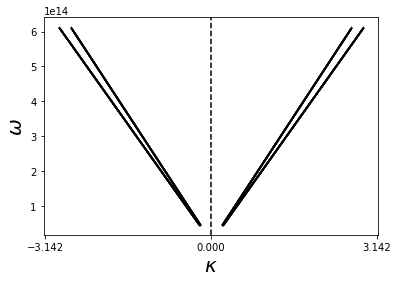

In [5]:
t = np.zeros((m, 4), dtype = complex)

for i in range(m):
    t[i] = propagation(2.*eps0, 1.7*eps0, (1 - (omega_p/omega[i])**2)*eps0, mu0, kx0, ky0, omega[i])
    

from matplotlib import pyplot as plt 

plt.figure(figsize=(6,4))


plt.xlabel(r"$\kappa$", fontsize = 20)
plt.ylabel(r"$\omega$", fontsize = 20)
plt.scatter(k[:, 0], omega,s = 0.1, marker='.',  color = "black")
plt.scatter(k[:,1], omega,s = 0.1, marker='.', color = "black")
plt.scatter(k[:, 2], omega,s = 0.1, marker='.', color = "black")
plt.scatter(k[:, 3], omega,s = 0.1, marker='.', color = "black")
plt.axvline(0, linestyle='--', color='k')
plt.xticks([-np.pi, 0, np.pi])
#plt.yticks([])

# Finding the band dispersion. ex $\neq$ ey

In [123]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

length  = 1e-6
omega_p = 0.1*np.pi*c/length

# problem parameters 
m       = 10000
omega   = (1+0.001)*omega_p
n1      = 1
n2      = 1
theta   = 0
phi     = 0
thetar  = np.arcsin(n1*np.sin(theta)/n2)



kx0     = 5e-7*np.sqrt(2)*omega_p/c
ky0     = np.linspace(-0.1*np.sqrt(2)*omega/c, 0.1*np.sqrt(2)*omega/c, m)

    
# material parameters



T   = np.zeros((m, 4, 4), dtype = complex)

q1    = np.zeros((m, 4), dtype = complex)
k     = np.zeros((m, 4), dtype = float)
t     = np.zeros((m, 4), dtype = complex)


for i in range(m):
    
    epsA = np.array([[2., 0, 0], [0, 1.7, 0], [0, 0, 1 - (omega_p/omega)**2]])*eps0
    muA  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
    xiA  = np.zeros((3,3), dtype = complex)
    zetA = np.zeros((3,3), dtype = complex)
    dA   = length
    
    Uniform_ep_list = [epsA]
    Uniform_mu_list = [muA]
    Uniform_xi_list = [xiA]
    Uniform_zeta_list = [zetA]
    thickness_list  = [dA]
    phi_list = [0.]

    T[i] = Tmatrix(omega, kx0, ky0[i], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list, phi_list)
    
        
    q1[i]  = BandStructure(T[i], thickness_list[0])
    t[i] = propagation(2.*eps0, 1.7*eps0, (1 - (omega_p/omega)**2)*eps0, mu0, kx0, ky0[i], omega)*dA
    
    for j in range(4):
        if np.abs(np.imag(q1[i, j])/np.abs(q1[i,j])) < 1e-5:
            k[i,j] = np.real(q1[i,j])*np.sum(thickness_list)
        else:
            k[i,j] = None
            
    Uniform_ep_list = []
    Uniform_mu_list = []
    Uniform_xi_list = []
    Uniform_zeta_list = []
    thickness_list  = []

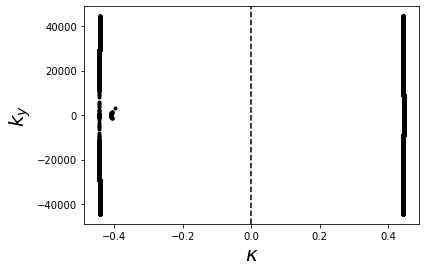

In [124]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(6,4))

plt.xlabel(r"$\kappa$", fontsize = 20)
plt.ylabel(r"$k_y$", fontsize = 20)
#plt.scatter(k[:, 0], omega/omega_p, marker='.',  color = "black")
plt.scatter(k[:, 2], ky0, marker='.', color = "black")
#plt.scatter(k[:, 1], omega/omega_p, marker='.', color = "black")
#plt.scatter(k[:, 3], omega/omega_p, marker='.', color = "black")
plt.axvline(0, linestyle='--', color='k')

In [125]:
find_nearest(k[:,2], 0.4442882938158366)

(0.4442881621268723, 7234)

In [126]:
ky0[7234]*length

0.019877086803160693

<ipython-input-127-6adb4eb5b780>:8: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(b, np.sqrt(np.array(b)*4)*omega_p/c*length, 'r--')
<ipython-input-127-6adb4eb5b780>:9: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(b, -np.sqrt(-np.array(b)*2*(2-1.7)/(1.7))*omega_p/c*length, 'r--')


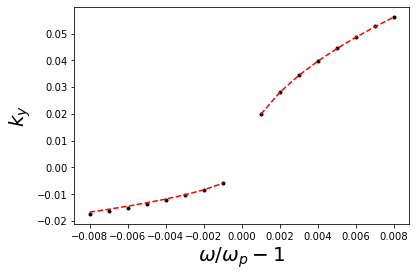

In [127]:
a = [-0.01754, -0.01631, -0.01501, -0.0136, -0.01211, -0.01042, -0.0085, -0.0059, 0.0199, 0.0281, 0.0344, 0.0398, 0.0445, 0.0487, 0.0527, 0.0563]
b = [-0.008, -0.007, -0.006, -0.005, -0.004, -0.003, -0.002, -0.001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]

plt.figure;
plt.xlabel(r"$\omega/\omega_p-1$", fontsize = 20)
plt.ylabel(r"$k_y$", fontsize = 20)
plt.scatter(b, a, marker='.', color = "black")
plt.plot(b, np.sqrt(np.array(b)*4)*omega_p/c*length, 'r--')
plt.plot(b, -np.sqrt(-np.array(b)*2*(2-1.7)/(1.7))*omega_p/c*length, 'r--')

In [136]:
0.01754/(np.sqrt(2)*omega_p/c*length)

0.0394788704634891

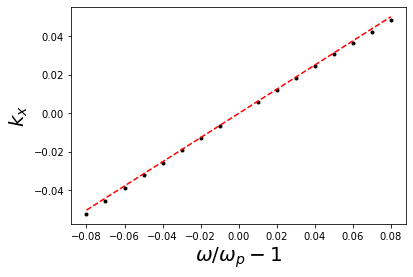

In [102]:
a = [-0.0525, -0.0456, -0.0389, -0.0322, -0.0257, -0.01915, -0.0127, -0.0063, 0.0062, 0.0124, 0.0186, 0.0247, 0.0307, 0.0367, 0.0425, 0.0484]
b = [-0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]

plt.figure;
plt.xlabel(r"$\omega/\omega_p-1$", fontsize = 20)
plt.ylabel(r"$k_x$", fontsize = 20)
plt.scatter(b, a, marker='.', color = "black")
plt.plot(b, np.array(b)*omega_p*2/c*length, 'r--')